<a href="https://colab.research.google.com/github/ulises1229/DataAnalisysBigData_BLOQUE/blob/main/code/BigData_BLOQUE_Sesi%C3%B3n_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

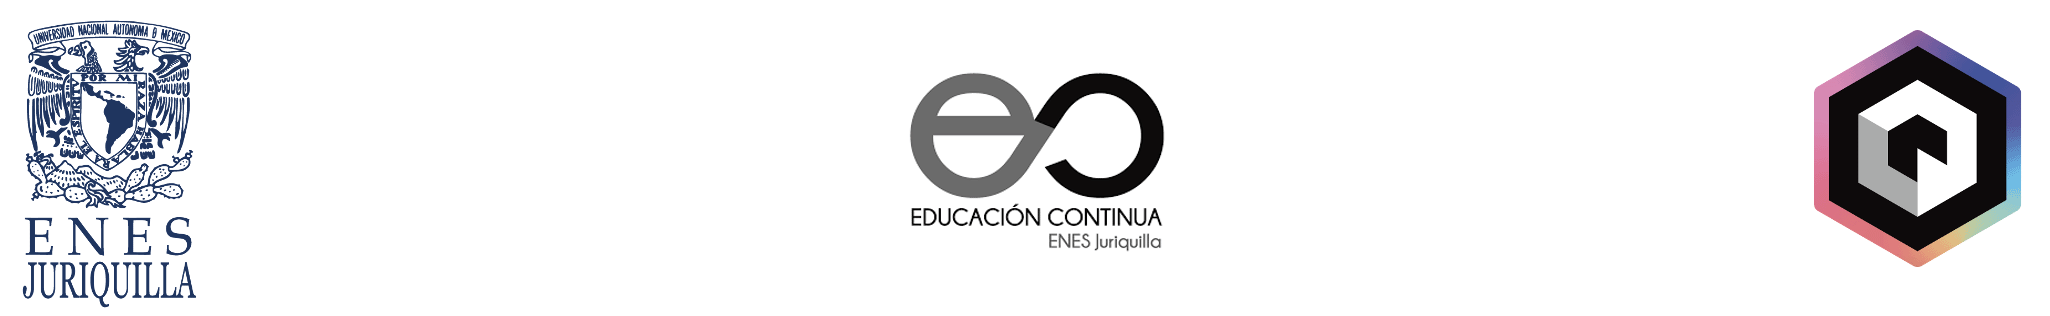



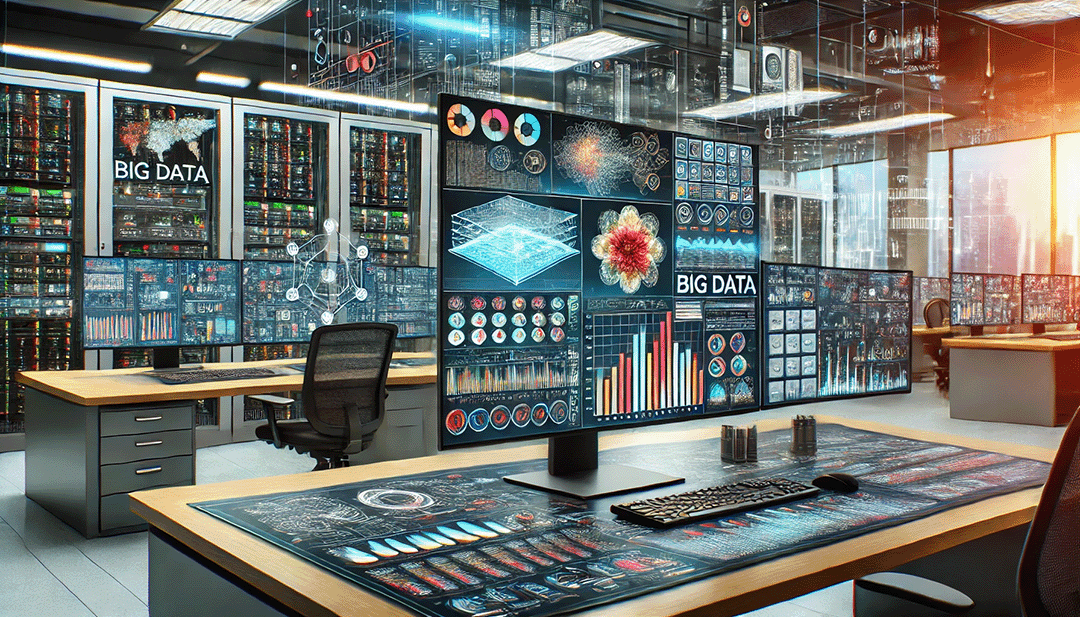

# Curso de capacitación en Análisis de Datos y Big Data
### Día 7 - Aprendizaje supervisado y regresiones

##### Autor: Ulises Olivares
##### uolivares@unam.mx
##### 27 de agosto de 2024

# 1. Clasificación usando sklearn: Random Forest, Decision Trees, y K-Nearest Neighbors

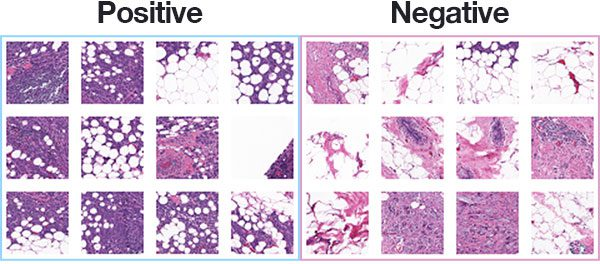

## Introducción
En esta clase de 3 horas, aprenderemos cómo utilizar tres algoritmos de clasificación populares: Random Forest, Decision Trees, y K-Nearest Neighbors. Usaremos el conjunto de datos de `breast_cancer` para entrenar y evaluar los modelos. También cubriremos cómo evaluar el rendimiento del modelo utilizando métricas como la matriz de confusión y la curva ROC.

In [1]:
# Cargar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay


## Cargar y preparar los datos
Usaremos el conjunto de datos `breast_cancer` que ya está disponible en sklearn.

In [2]:
# Cargar datasets
breast_cancer_data = load_breast_cancer()
df_breast_cancer = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_breast_cancer['target'] = breast_cancer_data.target

# División de datos en conjuntos de entrenamiento y prueba
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(df_breast_cancer.drop(columns='target'), df_breast_cancer['target'], test_size=0.3, random_state=42)


In [3]:
print(X_train_bc.shape)
X_train_bc.head()

(398, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [ ]:
import seaborn as sns
sns.pairplot(X_train_bc)

## Creación y entrenamiento de los modelos
A continuación, crearemos y entrenaremos los modelos utilizando Random Forest, Decision Tree, y K-Nearest Neighbors.

In [ ]:
# Creación de los modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    model.fit(X_train_bc, y_train_bc)
    y_pred_bc = model.predict(X_test_bc)

    # Métricas de rendimiento
    accuracy = accuracy_score(y_test_bc, y_pred_bc)
    f1 = f1_score(y_test_bc, y_pred_bc)
    cm = confusion_matrix(y_test_bc, y_pred_bc)
    auc = roc_auc_score(y_test_bc, model.predict_proba(X_test_bc)[:, 1])

    # Guardar resultados
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm,
        'roc_auc': auc
    }

    # Mostrar matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test_bc, model.predict_proba(X_test_bc)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


## Resultados y análisis
A continuación, presentamos una tabla con las métricas de rendimiento obtenidas para cada modelo.

In [ ]:
# Guardar los resultados en un DataFrame para revisión
results_df = pd.DataFrame(results).T
results_df

## Ejercicio adicional
Utiliza los mismos modelos para el conjunto de datos `iris`. Compara los resultados obtenidos con los que hemos calculado para el conjunto de datos `breast_cancer`.

In [ ]:
# Cargar dataset iris
iris_data = load_iris()
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = iris_data.target

In [ ]:

# Ejercicio adicional
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(df_iris.drop(columns='target'), df_iris['target'], test_size=0.3, random_state=42)

results_iris = {}
for name, model in models.items():
    model.fit(X_train_iris, y_train_iris)
    y_pred_iris = model.predict(X_test_iris)

    # Métricas de rendimiento
    accuracy = accuracy_score(y_test_iris, y_pred_iris)
    f1 = f1_score(y_test_iris, y_pred_iris, average='weighted')
    cm = confusion_matrix(y_test_iris, y_pred_iris)

    # Guardar resultados
    results_iris[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    # Mostrar matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name} - Iris Dataset')
    plt.show()

# Mostrar resultados
results_iris_df = pd.DataFrame(results_iris).T
results_iris_df

# 2. Estructura de un Pipeline de IA en sklearn
En este notebook, se presentará cómo construir un pipeline de IA usando `sklearn`. Los pipelines son una herramienta poderosa para simplificar y estructurar el flujo de trabajo de un modelo de machine learning, desde la preprocesamiento hasta la predicción final.

## Pasos principales en un Pipeline de IA
1. **Carga de Datos**: Importación del conjunto de datos.
2. **Preprocesamiento**: Limpieza y transformación de los datos.
3. **División de Datos**: Separación en conjuntos de entrenamiento y prueba.
4. **Construcción del Pipeline**: Encadenamiento de los pasos del pipeline.
5. **Entrenamiento y Evaluación del Modelo**: Ajuste del modelo a los datos y evaluación de su rendimiento.


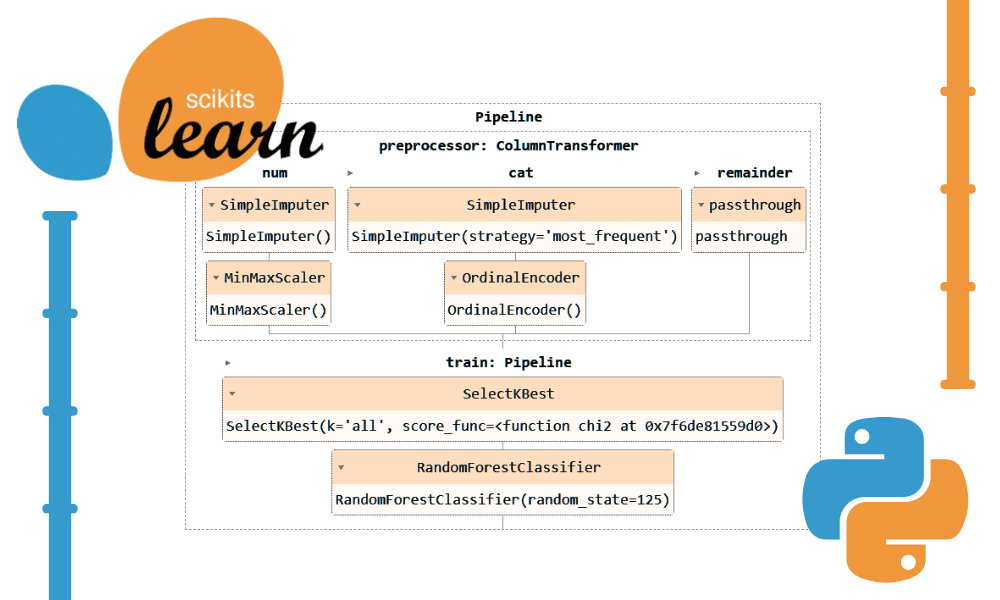

## 1. Carga de Datos
Comenzamos cargando un conjunto de datos. Para este ejemplo, utilizaremos el conjunto de datos `wine` de `sklearn`.

In [ ]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

## 2. Preprocesamiento
El preprocesamiento es un paso crucial en cualquier pipeline. Incluye la normalización de los datos, manejo de valores faltantes, y cualquier otra transformación necesaria antes de entrenar el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## 3. División de Datos
Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Construcción del Pipeline
Aquí es donde construimos el pipeline. Un pipeline en `sklearn` puede incluir múltiples etapas de preprocesamiento, seguido del modelo de machine learning.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

## 5. Entrenamiento y Evaluación del Modelo
Finalmente, entrenamos el pipeline en los datos de entrenamiento y lo evaluamos en los datos de prueba.

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# Regresión usando sklearn: Linear Regression, Ridge, y Lasso

## Introducción
En esta clase de 3 horas, aprenderemos cómo utilizar tres algoritmos de regresión populares: Linear Regression, Ridge, y Lasso. Usaremos el conjunto de datos de `diabetes` que ya está disponible en sklearn para entrenar y evaluar los modelos. También cubriremos cómo evaluar el rendimiento del modelo utilizando métricas como el Mean Squared Error (MSE) y el R-squared (R2).

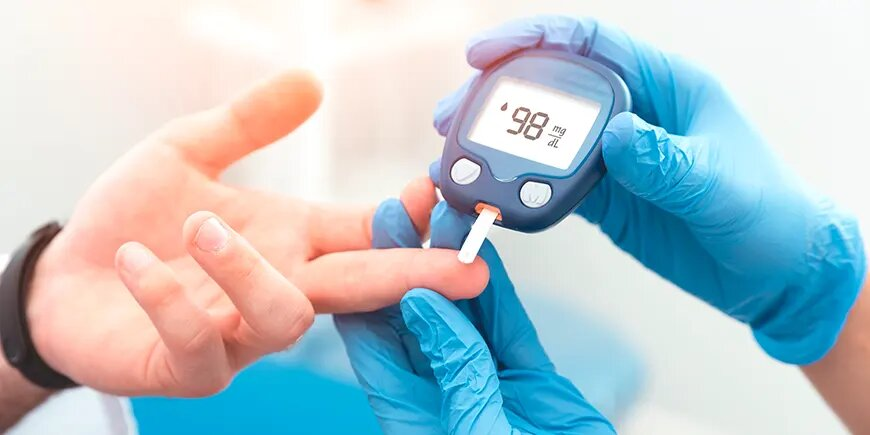


In [ ]:
# Cargar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


## Cargar y preparar los datos
Usaremos el conjunto de datos `diabetes` que ya está disponible en sklearn.

In [ ]:
# Cargar dataset
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['target'] = diabetes_data.target

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop(columns='target'), df_diabetes['target'], test_size=0.3, random_state=42)


## Creación y entrenamiento de los modelos
A continuación, crearemos y entrenaremos los modelos utilizando Linear Regression, Ridge, y Lasso.

In [ ]:
# Creación de los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    results[name] = {
        'MSE': mse,
        'R2': r2
    }

    # Gráfica de predicciones vs valores reales
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Real vs Predicted for {name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.show()


## Resultados y análisis
A continuación, presentamos una tabla con las métricas de rendimiento obtenidas para cada modelo.

In [ ]:
# Guardar los resultados en un DataFrame para revisión
results_df = pd.DataFrame(results).T
results_df

## Ejercicio adicional
Utiliza los mismos modelos para otros conjuntos de datos de regresión disponibles en sklearn. Compara los resultados obtenidos con los que hemos calculado para el conjunto de datos `diabetes`.